In [ ]:
import tensorflow as tf
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.makedirs('/content/drive/MyDrive/DAISY-Project/models', exist_ok=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load ResNet50 base model
base_model = ResNet50(
    weights='imagenet',        # Use pre-trained ImageNet weights
    include_top=False,         # Exclude top dense layers
    input_shape=(224, 224, 3)  # Input shape for 224x224 RGB images
)

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce spatial dimensions
x = Dense(128, activation='relu')(x)  # Hidden layer
predictions = Dense(5, activation='softmax')(x)  # Output for 5 classes

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers to prevent training
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:

model.save('/content/drive/MyDrive/DAISY-Project/models/resnet50_base.h5')
print("Model saved to MyDrive/DAISY-Project/models/resnet50_base.h5")

Model saved to MyDrive/DAISY-Project/models/resnet50_base.h5


In [ ]:
# Save model in native Keras format
model.save('/content/drive/MyDrive/DAISY-Project/models/resnet50_base.keras')
print("Model saved to MyDrive/DAISY-Project/models/resnet50_base.keras")

Model saved to MyDrive/DAISY-Project/models/resnet50_base.keras


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/DAISY-Project/models/resnet50_base.keras')
loaded_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,113,548 (91.99 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 262,919 (1.00 MB)

Found 6871 images belonging to 5 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Sample predictions shape: (32, 5)
Sample labels shape: (32, 5)


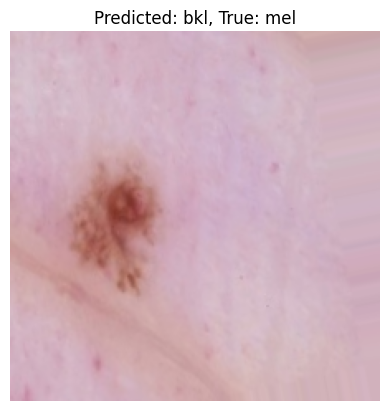

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Recreate train generator (from Step 2)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2
)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Get a batch
images, labels = next(train_generator)

# Predict
predictions = model.predict(images)
print("Sample predictions shape:", predictions.shape)  # Expected: (32, 5)
print("Sample labels shape:", labels.shape)          # Expected: (32, 5)

# Visualize a sample
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
idx = 0
plt.imshow(images[idx])
pred_label = class_names[np.argmax(predictions[idx])]
true_label = class_names[np.argmax(labels[idx])]
plt.title(f"Predicted: {pred_label}, True: {true_label}")
plt.axis('off')
plt.show()

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/DAISY-Project/models/resnet50_base.keras')
print("Model loaded successfully")


Model loaded successfully


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Only rescale for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Create train generator
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Create validation generator
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Quick check
print("Train samples:", train_generator.n)
print("Validation samples:", val_generator.n)
print("Class indices:", train_generator.class_indices)


Found 6871 images belonging to 5 classes.
Found 1961 images belonging to 5 classes.
Train samples: 6871
Validation samples: 1961
Class indices: {'akiec': 0, 'bcc': 1, 'bkl': 2, 'mel': 3, 'nv': 4}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        '/content/drive/MyDrive/DAISY-Project/models/resnet50_best.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]


In [ ]:
# Training plan (to be executed in Day 3)
# model.fit(
#     train_generator,
#     epochs=10,
#     steps_per_epoch=len(train_generator),
#     validation_data=val_generator,
#     validation_steps=len(val_generator),
#     callbacks=callbacks
# )

In [ ]:
# Load model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/DAISY-Project/models/resnet50_base.keras')

# Test with one batch
images, labels = next(train_generator)
predictions = model.predict(images)
print("Predictions shape:", predictions.shape)  # Expected: (32, 5)
print("Labels shape:", labels.shape)            # Expected: (32, 5)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predictions shape: (32, 5)
Labels shape: (32, 5)


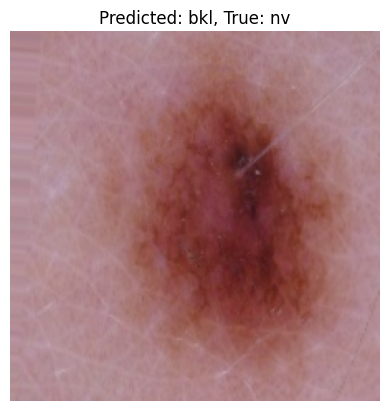

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

# Pick any image index (0–31)
idx = 0
plt.imshow(images[idx])
plt.title(f"Predicted: {class_names[np.argmax(predictions[idx])]}, True: {class_names[np.argmax(labels[idx])]}")
plt.axis('off')
plt.show()


In [1]:
import tensorflow as tf
print("GPU Devices:", tf.config.list_physical_devices('GPU'))


GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!pip install scikit-learn==1.5.2 matplotlib==3.9.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 133.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [1]:
!pip install scikit-learn==1.6.1 matplotlib==3.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 128.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.2
    Uninstalling matplotlib-3.9.2:
      Successfully uninstalled matplotlib-3.9.2


In [1]:
import tensorflow as tf
print("GPU Devices:", tf.config.list_physical_devices('GPU'))


GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

print("Model exists:", os.path.exists('/content/drive/MyDrive/DAISY-Project/models/resnet50_base.keras'))
print("Train data exists:", os.path.exists('/content/drive/MyDrive/DAISY-Project/datasets/split/train'))


Model exists: True
Train data exists: True


In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = load_model('/content/drive/MyDrive/DAISY-Project/models/resnet50_base.keras')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/DAISY-Project/models/resnet50_best.keras',
                    save_best_only=True, verbose=1)
]

history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

model.save('/content/drive/MyDrive/DAISY-Project/models/resnet50_trained.keras')


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Found 6871 images belonging to 5 classes.
Found 1961 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.6699 - loss: 1.1038 
Epoch 1: val_loss improved from inf to 1.02465, saving model to /content/drive/MyDrive/DAISY-Project/models/resnet50_best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 6322s 29s/step - accuracy: 0.6699 - loss: 1.1036 - val_accuracy: 0.6854 - val_loss: 1.0246
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.6760 - loss: 1.0652
Epoch 2: val_loss did not improve from 1.02465
215/215 ━━━━━━━━━━━━━━━━━━━━ 123s 540ms/step - accuracy: 0.6761 - loss: 1.0650 - val_accuracy: 0.6843 - val_loss: 1.0768
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.6759 - loss: 1.0497
Epoch 3: val_loss improved from 1.02465 to 1.01831, saving model to /content/drive/MyDrive/DAISY-Project/models/resnet50_best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 142s 539ms/step - accuracy: 0.6759 - loss: 1.0496 - val_accuracy: 0.6854 - val_loss: 1.0183
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.

62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step


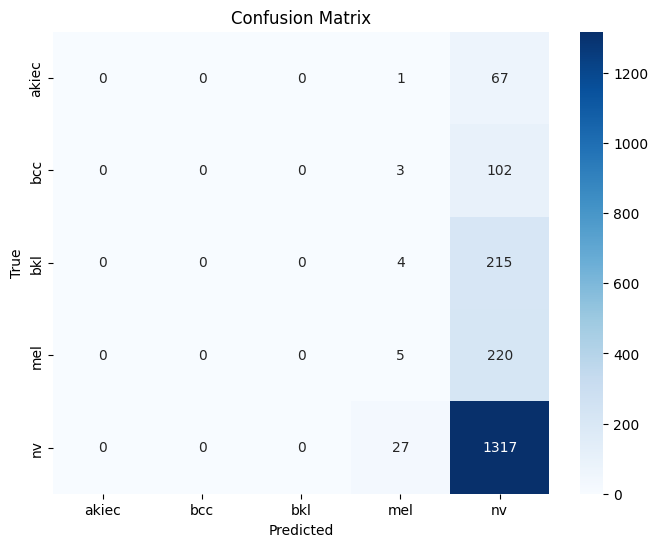

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        68
         bcc       0.00      0.00      0.00       105
         bkl       0.00      0.00      0.00       219
         mel       0.12      0.02      0.04       225
          nv       0.69      0.98      0.81      1344

    accuracy                           0.67      1961
   macro avg       0.16      0.20      0.17      1961
weighted avg       0.48      0.67      0.56      1961



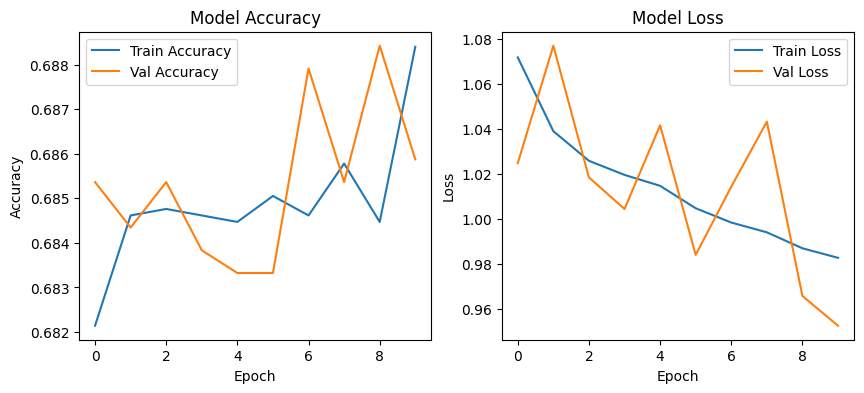

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reset validation generator
val_generator.reset()
preds = model.predict(val_generator)
pred_labels = np.argmax(preds, axis=1)
true_labels = val_generator.classes

# Confusion matrix
class_names = ['akiec', 'bcc', 'bkl', 'mel', 'nv']
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/content/drive/MyDrive/DAISY-Project/docs/confusion_matrix.png')
plt.show()

# Classification report
report = classification_report(true_labels, pred_labels, target_names=class_names)
print("Classification Report:\n", report)

# Save report
with open('/content/drive/MyDrive/DAISY-Project/docs/classification_report.txt', 'w') as f:
    f.write(report)

# Plot training curves (if not done)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/DAISY-Project/docs/training_curves.png')
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Re-create generators (ensure consistency)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/DAISY-Project/datasets/split/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/DAISY-Project/models/resnet50_best.keras')

# Define class weights (inverse class frequency)
class_weights = {
    0: 5.0,  # akiec (~68 samples, high weight)
    1: 3.0,  # bcc (~105 samples)
    2: 2.0,  # bkl (~219 samples)
    3: 5.0,  # mel (~225 samples)
    4: 1.0   # nv (~1,344 samples, low weight)
}

# Recompile with Adam
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/DAISY-Project/models/resnet50_weighted.keras', save_best_only=True, verbose=1)
]

# Fine-tune
history_weighted = model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    class_weight=class_weights,
    callbacks=callbacks
)

# Save fine-tuned model
model.save('/content/drive/MyDrive/DAISY-Project/models/resnet50_trained.keras')

Found 6871 images belonging to 5 classes.
Found 1961 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5915 - loss: 2.4881
Epoch 1: val_loss improved from inf to 1.04603, saving model to /content/drive/MyDrive/DAISY-Project/models/resnet50_weighted.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 136s 581ms/step - accuracy: 0.5916 - loss: 2.4880 - val_accuracy: 0.6828 - val_loss: 1.0460
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.6043 - loss: 2.4750
Epoch 2: val_loss did not improve from 1.04603
215/215 ━━━━━━━━━━━━━━━━━━━━ 129s 539ms/step - accuracy: 0.6043 - loss: 2.4749 - val_accuracy: 0.6696 - val_loss: 1.0803
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.6394 - loss: 2.3979
Epoch 3: val_loss did not improve from 1.04603
215/215 ━━━━━━━━━━━━━━━━━━━━ 115s 534ms/step - accuracy: 0.6393 - loss: 2.3980 - val_accuracy: 0.6527 - val_loss: 1.0951
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.5932 - loss: 2.4382
Epoch 4: val_loss did not improve from 1.04603
215/215 ━━━━━━━━

62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step


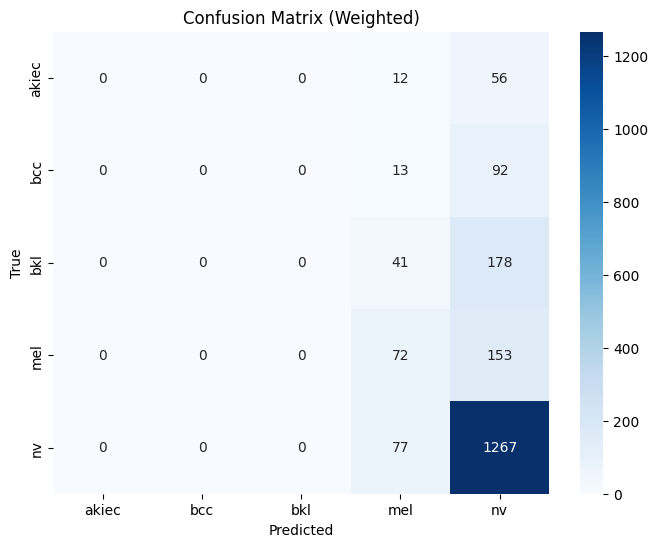

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report (Weighted):
               precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        68
         bcc       0.00      0.00      0.00       105
         bkl       0.00      0.00      0.00       219
         mel       0.33      0.32      0.33       225
          nv       0.73      0.94      0.82      1344

    accuracy                           0.68      1961
   macro avg       0.21      0.25      0.23      1961
weighted avg       0.54      0.68      0.60      1961



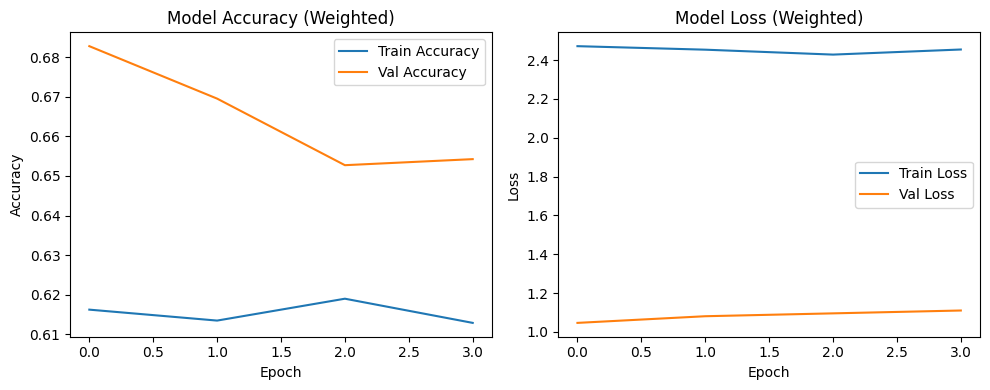

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reset validation generator
val_generator.reset()
preds = model.predict(val_generator)
pred_labels = np.argmax(preds, axis=1)
true_labels = val_generator.classes

# Confusion matrix
class_names = ['akiec', 'bcc', 'bkl', 'mel', 'nv']
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Weighted)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/content/drive/MyDrive/DAISY-Project/docs/confusion_matrix_weighted.png')
plt.show()

# Classification report
report = classification_report(true_labels, pred_labels, target_names=class_names)
print("Classification Report (Weighted):\n", report)

# Save report
with open('/content/drive/MyDrive/DAISY-Project/docs/classification_report_weighted.txt', 'w') as f:
    f.write(report)

# Plot training curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_weighted.history['accuracy'], label='Train Accuracy')
plt.plot(history_weighted.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy (Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_weighted.history['loss'], label='Train Loss')
plt.plot(history_weighted.history['val_loss'], label='Val Loss')
plt.title('Model Loss (Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/DAISY-Project/docs/training_curves_weighted.png')
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step


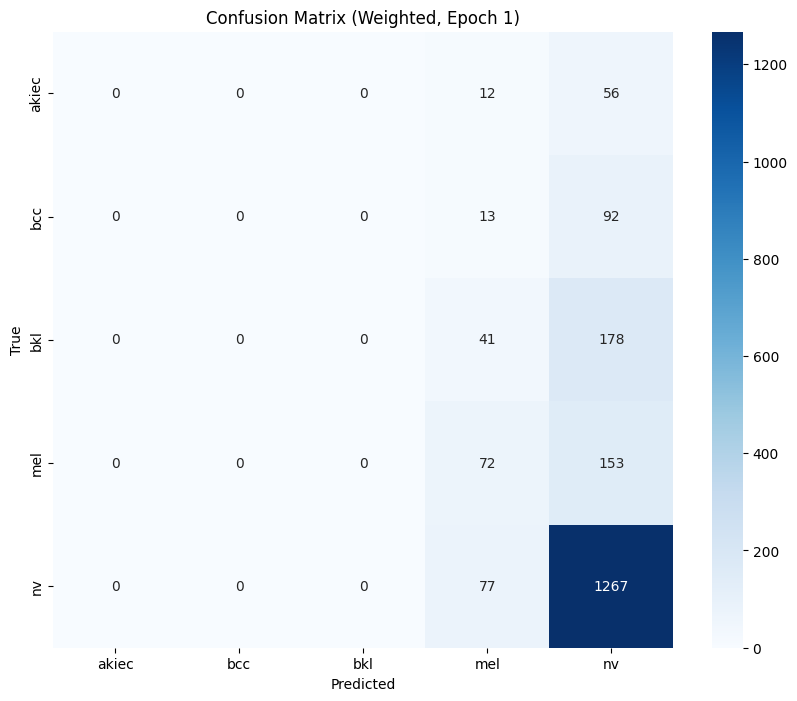

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Classification Report (Weighted, Epoch 1):
               precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        68
         bcc       0.00      0.00      0.00       105
         bkl       0.00      0.00      0.00       219
         mel       0.33      0.32      0.33       225
          nv       0.73      0.94      0.82      1344

    accuracy                           0.68      1961
   macro avg       0.21      0.25      0.23      1961
weighted avg       0.54      0.68      0.60      1961



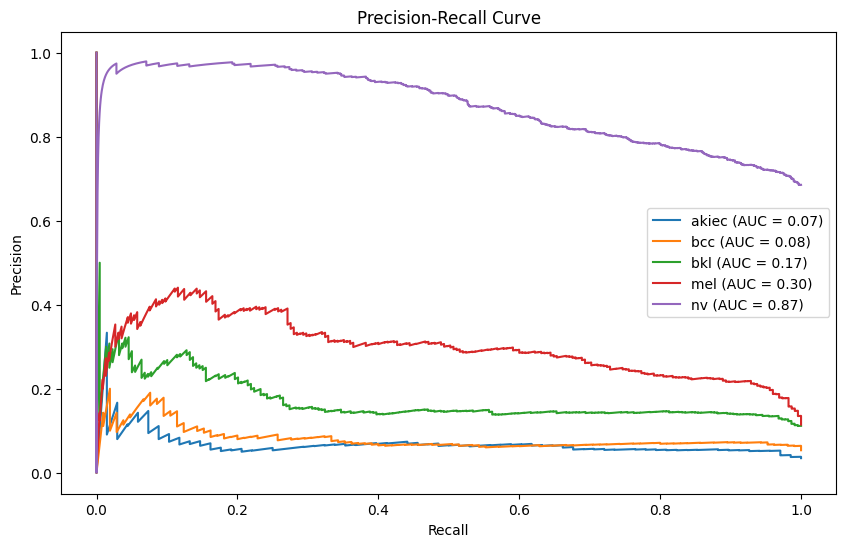

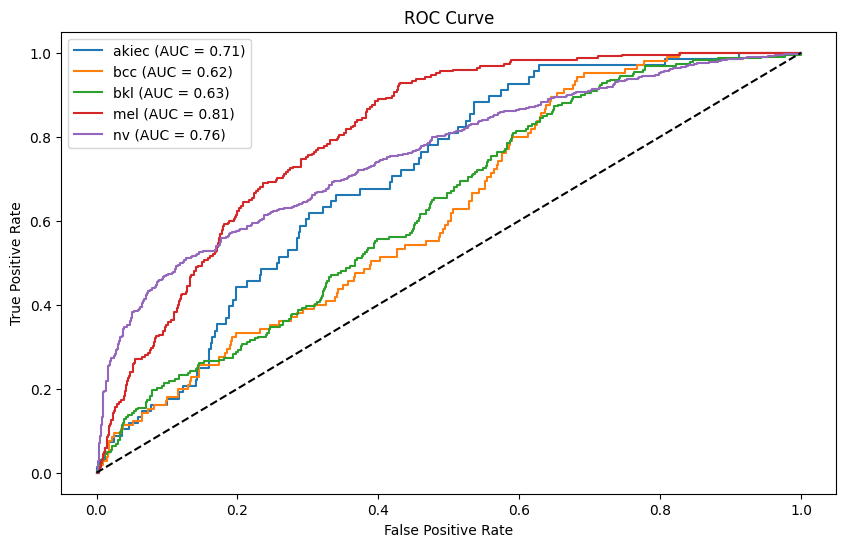

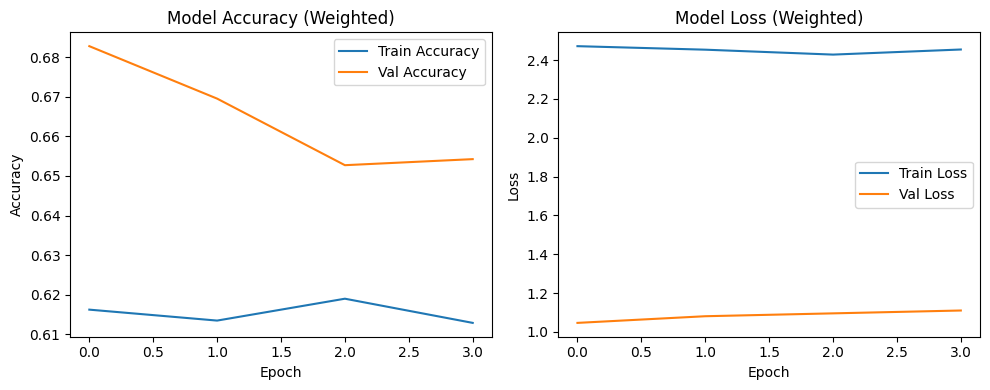

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Load fine-tuned model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/DAISY-Project/models/resnet50_weighted.keras')

# Reset and predict
val_generator.reset()
preds = model.predict(val_generator)
pred_labels = np.argmax(preds, axis=1)
true_labels = val_generator.classes
class_names = ['akiec', 'bcc', 'bkl', 'mel', 'nv']

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Weighted, Epoch 1)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/content/drive/MyDrive/DAISY-Project/docs/confusion_matrix_weighted.png')
plt.show()

# Classification report
report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)
print("Classification Report (Weighted, Epoch 1):\n", classification_report(true_labels, pred_labels, target_names=class_names))
with open('/content/drive/MyDrive/DAISY-Project/docs/classification_report_weighted.json', 'w') as f:
    import json
    json.dump(report, f, indent=4)

# Precision-Recall Curve
y_test_bin = label_binarize(true_labels, classes=range(5))
plt.figure(figsize=(10, 6))
for i in range(5):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], preds[:, i])
    plt.plot(recall, precision, label=f'{class_names[i]} (AUC = {auc(recall, precision):.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('/content/drive/MyDrive/DAISY-Project/docs/pr_curve.png')
plt.show()

# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('/content/drive/MyDrive/DAISY-Project/docs/roc_curve.png')
plt.show()

# Training curves (fine-tuning)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_weighted.history['accuracy'], label='Train Accuracy')
plt.plot(history_weighted.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy (Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_weighted.history['loss'], label='Train Loss')
plt.plot(history_weighted.history['val_loss'], label='Val Loss')
plt.title('Model Loss (Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/DAISY-Project/docs/training_curves_weighted.png')
plt.show()